In [433]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC as SVM

def plot_classifier(clf,X_train,Y_train,X_test,Y_test,model_type):
    f, axis = plt.subplots(1, 1, sharex='col', sharey='row',figsize=(12, 8))
    axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,zorder=10,cmap='cool')
    axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,zorder=10,cmap='brg')
    XX, YY = np.mgrid[-2:2:200j, -2:2:200j]
    if model_type == 'tree':
        Z = clf.predict_proba(np.c_[XX.ravel(), YY.ravel()])[:,0]
    elif model_type == 'ann':
        Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    else: raise ValueError('model type not supported')
    Z = Z.reshape(XX.shape)
    Zplot = Z >= 0.5
    axis.pcolormesh(XX, YY, Zplot ,cmap='YlGn')
    axis.contour(XX, YY, Z, alpha=1, colors=["k", "k", "k"], linestyles=["--", "-", "--"],
    levels=[-2, 0, 2])
    plt.show()
np.random.seed(44)
from tensorflow import set_random_seed
set_random_seed(44)


# 1. Small Circle inside Large Circle

# A
A continuación se define la función y se muestra el gráfico correspondiente

In [177]:
def do_circles(n=2000,noisy_n=0.05):
    generator = check_random_state(10)
    linspace = np.linspace(0, 2 * np.pi, n // 2 + 1)[:-1]
    outer_circ_x = np.cos(linspace)
    outer_circ_y = np.sin(linspace)
    inner_circ_x = outer_circ_x * .3
    inner_circ_y = outer_circ_y * .3
    X = np.vstack((np.append(outer_circ_x, inner_circ_x),
    np.append(outer_circ_y, inner_circ_y))).T
    y = np.hstack([np.zeros(n // 2, dtype=np.intp),
    np.ones(n // 2, dtype=np.intp)])
    X += generator.normal(scale=noisy_n, size=X.shape)
    X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.5, random_state=44)
    return X_train,y_train,X_test,y_test
X_train, Y_train, X_test, Y_test = do_circles()

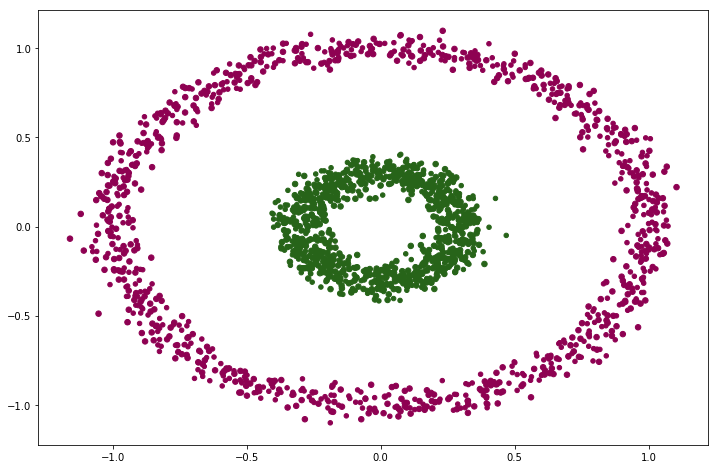

In [178]:
f, axis = plt.subplots(figsize=(12, 8))
axis.scatter(X_train[:,0],X_train[:,1],s=30,c=Y_train,cmap='PiYG')
#axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,cmap='bwr')
axis.scatter(X_test[:,0],X_test[:,1],s=20,c=Y_test,cmap='PiYG')
plt.show()

# B

In [255]:
model = Sequential()
model.add(Dense(1, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=50, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_acc = scores[1]
print(test_acc)

/Users/carlos/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/100
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6940 - acc: 0.5000
Epoch 2/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.6927 - acc: 0.5140
Epoch 3/100
1000/1000 [==============================] - 0s 51us/step - loss: 0.6763 - acc: 0.5890
Epoch 4/100
1000/1000 [==============================] - 0s 53us/step - loss: 0.6397 - acc: 0.6110
Epoch 5/100
1000/1000 [==============================] - 0s 60us/step - loss: 0.5987 - acc: 0.6470
Epoch 6/100
1000/1000 [==============================] - 0s 55us/step - loss: 0.5803 - acc: 0.6680
Epoch 7/100
1000/1000 [==============================] - 0s 60us/step - loss: 0.5724 - acc: 0.6600
Epoch 8/100
1000/1000 [==============================] - 0s 65us/step - loss: 0.5654 - acc: 0.6780
Epoch 9/100
1000/1000 [==============================] - 0s 59us/step - loss: 0.5595 - acc: 0.6810
Epoch 10/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.5586 - acc: 0.6840
Epoch 11/1

1000/1000 [==============================] - 0s 49us/step - loss: 0.5452 - acc: 0.6880
Epoch 83/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.5433 - acc: 0.6860
Epoch 84/100
1000/1000 [==============================] - 0s 48us/step - loss: 0.5445 - acc: 0.6890
Epoch 85/100
1000/1000 [==============================] - 0s 56us/step - loss: 0.5433 - acc: 0.6900
Epoch 86/100
1000/1000 [==============================] - 0s 52us/step - loss: 0.5451 - acc: 0.6850
Epoch 87/100
1000/1000 [==============================] - 0s 65us/step - loss: 0.5429 - acc: 0.6900
Epoch 88/100
1000/1000 [==============================] - 0s 62us/step - loss: 0.5426 - acc: 0.6900
Epoch 89/100
1000/1000 [==============================] - 0s 54us/step - loss: 0.5457 - acc: 0.6870
Epoch 90/100
1000/1000 [==============================] - 0s 58us/step - loss: 0.5440 - acc: 0.6870
Epoch 91/100
1000/1000 [==============================] - 0s 59us/step - loss: 0.5452 - acc: 0.6890
Epoch 92/100


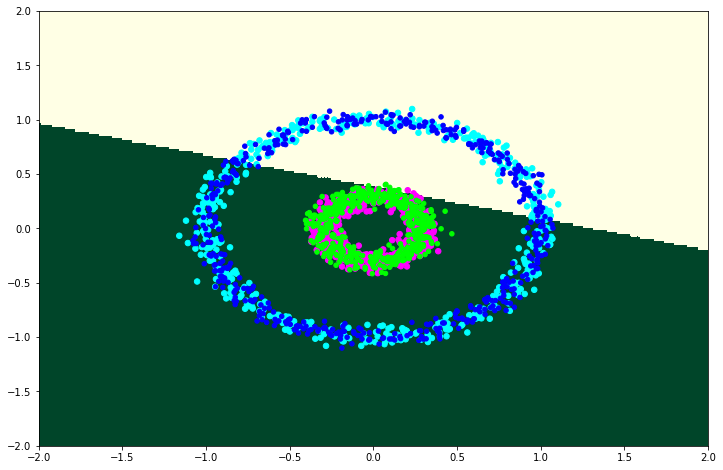

In [256]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

Las mejores soluciones obtenidas con una red neuronal de 1 neurona, tienen un score cercano a 0.69 sobre el conjunto de pruebas. Son resultados pésimos, dado que es un clasificador binario. Esto es debido a que con una neurona, solamente corta los datos con una recta, como se aprecia en el gráfico anterior.
Al usar 4 o más neuronas, se tiene un score de 1 para el conjunto de pruebas.

# C

In [389]:
TrainErrors=[]
TestErrors=[]
neuronas=[]
epoch=50
batch=100

In [390]:
n_h=2
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)



Epoch 1/50
1000/1000 [==============================] - 3s 3ms/step - loss: 0.6944 - acc: 0.5020
Epoch 2/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6936 - acc: 0.5060
Epoch 3/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6930 - acc: 0.5260
Epoch 4/50
1000/1000 [==============================] - 0s 31us/step - loss: 0.6925 - acc: 0.5160
Epoch 5/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.6915 - acc: 0.5260
Epoch 6/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.6854 - acc: 0.5720
Epoch 7/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.6752 - acc: 0.5660
Epoch 8/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.6509 - acc: 0.7160
Epoch 9/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.6122 - acc: 0.7730
Epoch 10/50
1000/1000 [==============================] - 0s 29us/step - loss: 0.5607 - acc: 0.7940
Epoch 11/50
1000/100

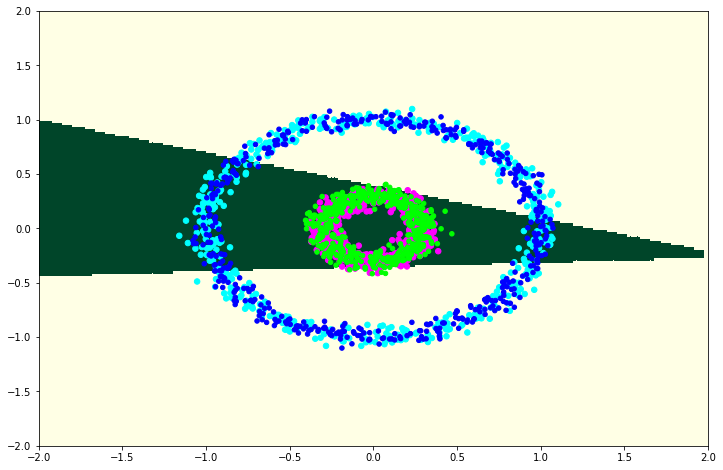

In [391]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [392]:
n_h=4
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6942 - acc: 0.4910
Epoch 2/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.6930 - acc: 0.5020
Epoch 3/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6905 - acc: 0.5150
Epoch 4/50
1000/1000 [==============================] - 0s 37us/step - loss: 0.6849 - acc: 0.5260
Epoch 5/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6661 - acc: 0.7140
Epoch 6/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.6250 - acc: 0.8560
Epoch 7/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.5467 - acc: 0.9560
Epoch 8/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.4337 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.3156 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.2256 - acc: 1.0000
Epoch 11/50
1000/100

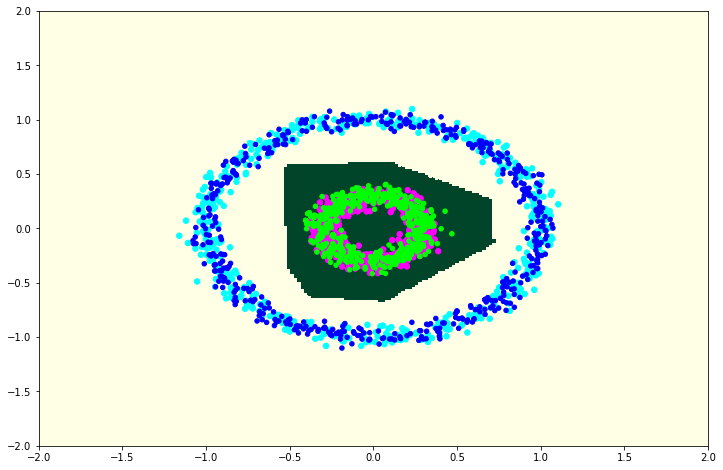

In [393]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [394]:
n_h=8
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6941 - acc: 0.4840
Epoch 2/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.6919 - acc: 0.5300
Epoch 3/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6898 - acc: 0.5300
Epoch 4/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6815 - acc: 0.5980
Epoch 5/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6627 - acc: 0.6730
Epoch 6/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.6215 - acc: 0.6550
Epoch 7/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.5576 - acc: 0.8530
Epoch 8/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.4702 - acc: 0.9040
Epoch 9/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.3720 - acc: 0.9480
Epoch 10/50
1000/1000 [==============================] - 0s 51us/step - loss: 0.2745 - acc: 0.9790
Epoch 11/50
1000/100

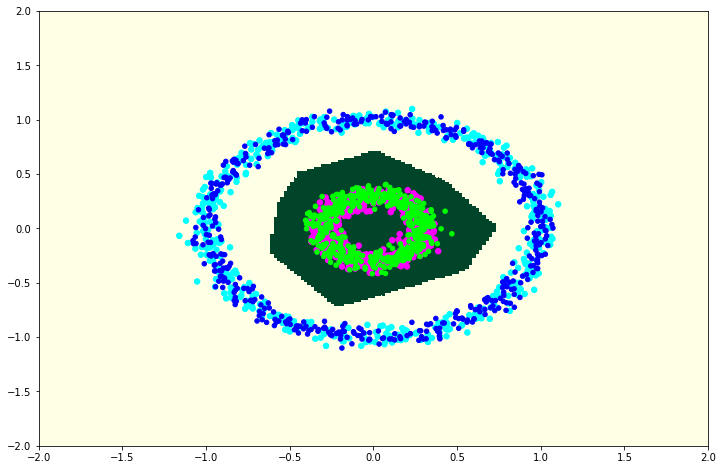

In [395]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [396]:
n_h=16
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6931 - acc: 0.5150
Epoch 2/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6915 - acc: 0.5270
Epoch 3/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.6842 - acc: 0.5630
Epoch 4/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.6701 - acc: 0.5900
Epoch 5/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6290 - acc: 0.7660
Epoch 6/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.5561 - acc: 0.9190
Epoch 7/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.4484 - acc: 0.9850
Epoch 8/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.3347 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 32us/step - loss: 0.2371 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.1695 - acc: 1.0000
Epoch 11/50
1000/100

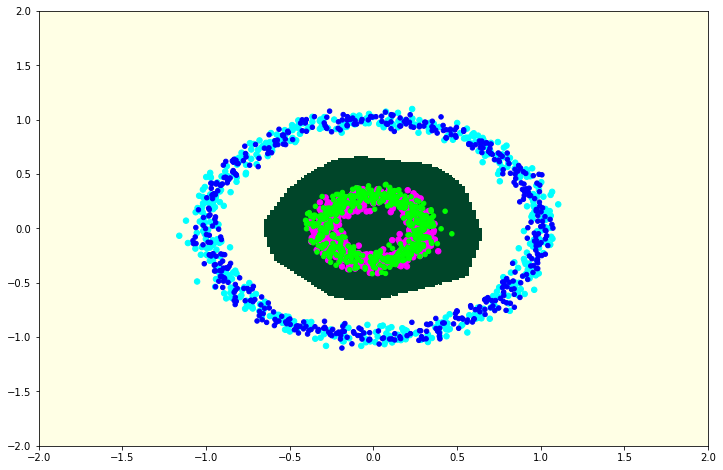

In [397]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

In [398]:
n_h=32
model = Sequential()
model.add(Dense(n_h, input_dim=X_train.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer=SGD(lr=1), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=epoch, batch_size=batch, verbose=1)
scores = model.evaluate(X_test, Y_test)
test_err = scores[0]
scores = model.evaluate(X_train, Y_train)
train_err = scores[0]
TrainErrors.append(train_err)
TestErrors.append(test_err)
neuronas.append(n_h)

Epoch 1/50
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6925 - acc: 0.5170
Epoch 2/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.6895 - acc: 0.6530
Epoch 3/50
1000/1000 [==============================] - 0s 36us/step - loss: 0.6769 - acc: 0.7040
Epoch 4/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.6476 - acc: 0.8310
Epoch 5/50
1000/1000 [==============================] - 0s 34us/step - loss: 0.5812 - acc: 0.9920
Epoch 6/50
1000/1000 [==============================] - 0s 30us/step - loss: 0.4753 - acc: 0.9920
Epoch 7/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.3543 - acc: 1.0000
Epoch 8/50
1000/1000 [==============================] - 0s 35us/step - loss: 0.2511 - acc: 1.0000
Epoch 9/50
1000/1000 [==============================] - 0s 33us/step - loss: 0.1799 - acc: 1.0000
Epoch 10/50
1000/1000 [==============================] - 0s 42us/step - loss: 0.1327 - acc: 1.0000
Epoch 11/50
1000/100

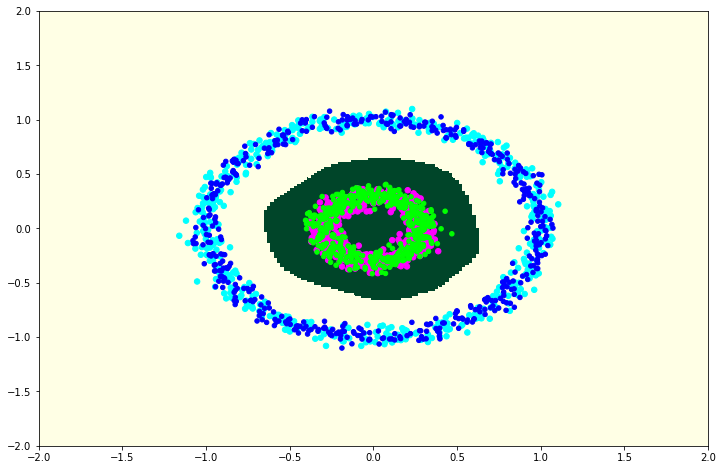

In [399]:
plot_classifier(model,X_train,Y_train,X_test,Y_test,'ann')

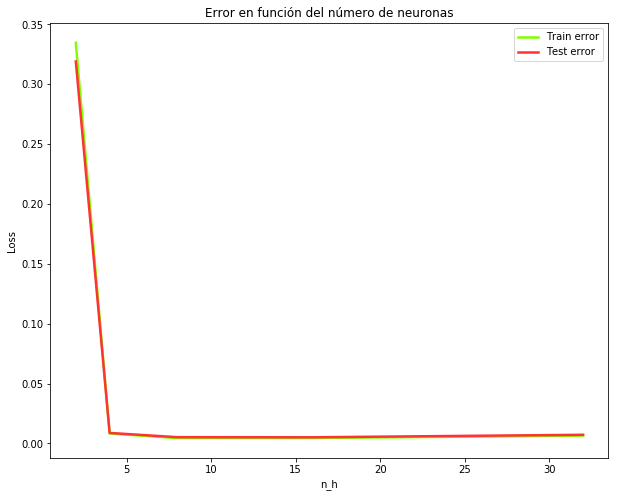

In [400]:
plt.figure(figsize=(10, 8))
plt.xlabel("n_h")
plt.ylabel("Loss")
plt.title("Error en función del número de neuronas")
plt.plot(neuronas, TrainErrors, lw=2.5, color=(0.5,1,0), label='Train error')
plt.plot(neuronas, TestErrors, lw=2.5, color=(1,0.2,0.2), label='Test error')
plt.legend()
plt.show()

El modelo alcanza el mínimo de error con 4 neuronas, luego converge.

# D

Test Accuracy = 0.677000
1


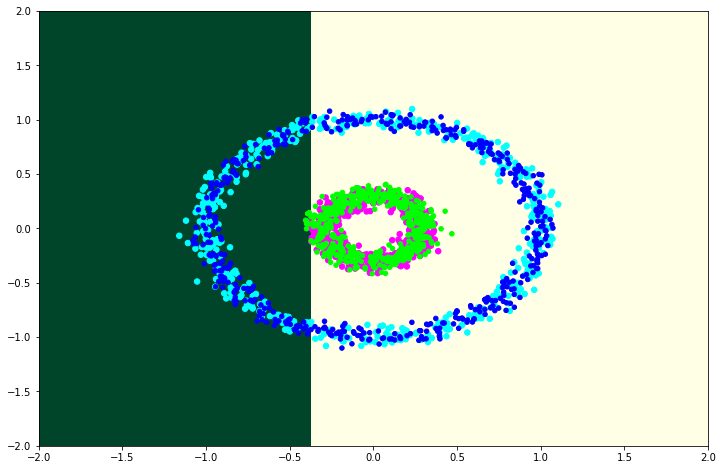

In [303]:
from sklearn.tree import DecisionTreeClassifier as Tree
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=1)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print (clf.tree_.max_depth)
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Debido a que el árbol de 1 solo nodo, divide los datos de manera lineal. No puede lograr separar los datos correctamente, teniendo un accuracy de solo 0.677.

# E

Test Accuracy = 0.869000
Profundidad  2  gini+best


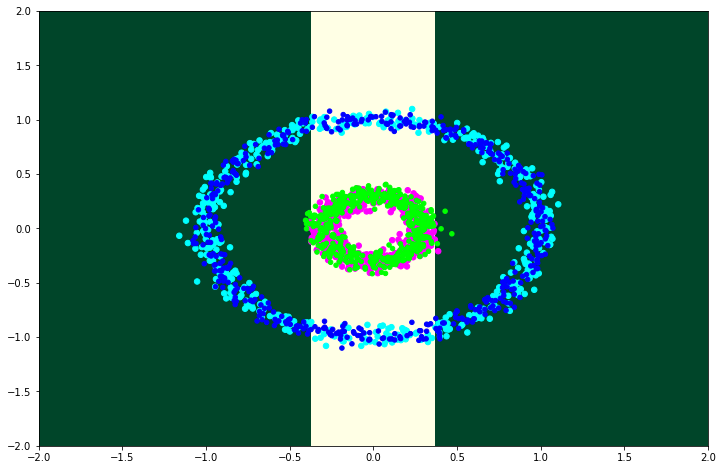

In [419]:
n_t=2
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+best")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')


Test Accuracy = 0.930000
Profundidad  3  gini+best


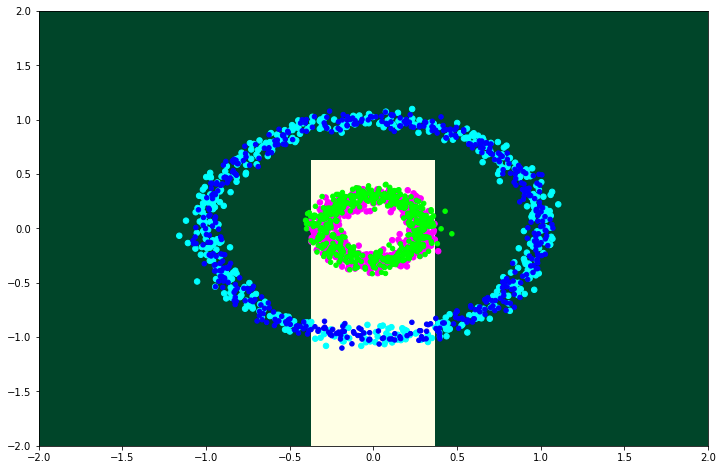

In [420]:
n_t=3
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+best")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.991000
Profundidad  4  gini+best


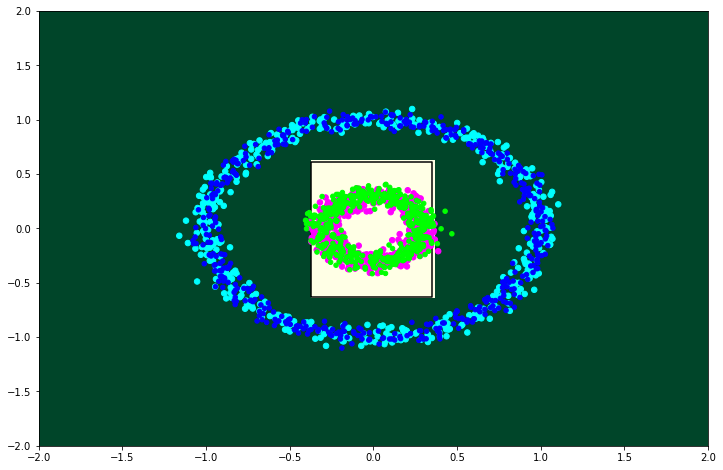

In [421]:
n_t=4
clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+best")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.744000
Profundidad  2  gini+random


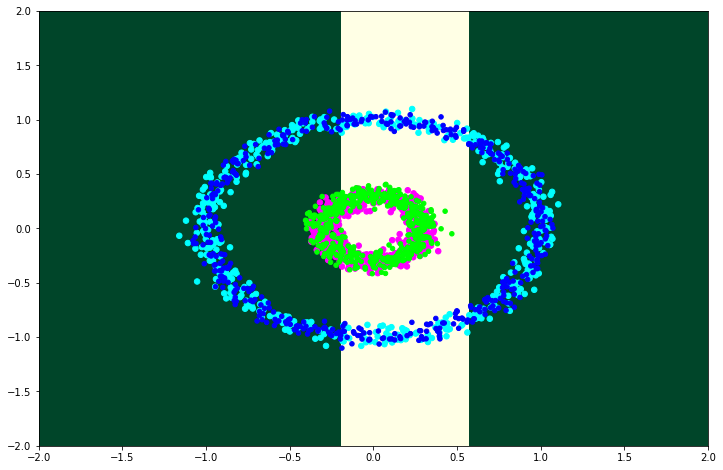

In [422]:
n_t=2
clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+random")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.968000
Profundidad  5  gini+random


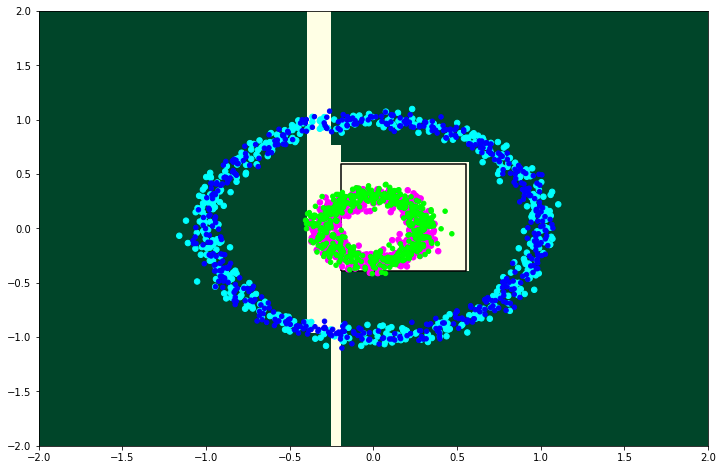

In [423]:
n_t=5
clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+random")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

Test Accuracy = 0.993000
Profundidad  9  gini+random


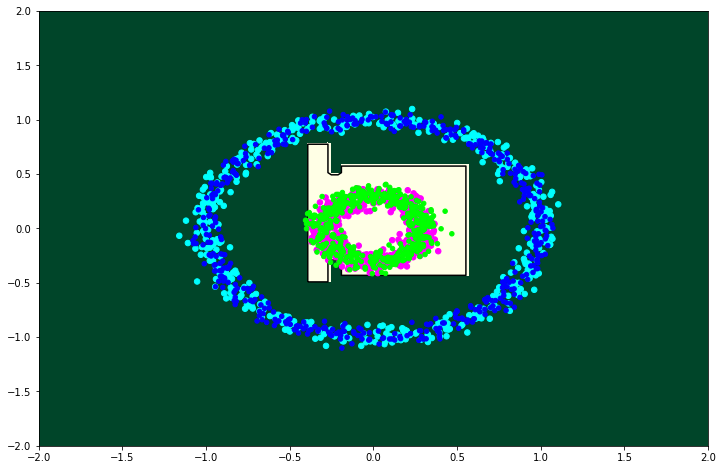

In [424]:
n_t=9
clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=n_t)
clf.fit(X_train,Y_train)
acc_test = clf.score(X_test,Y_test)
print ("Test Accuracy = %f"%acc_test)
print ("Profundidad ",clf.tree_.max_depth," gini+random")
plot_classifier(clf,X_train,Y_train,X_test,Y_test,'tree')

In [425]:
trainErrors=[]
testErrors=[]
depth=[]
for i in range(2,21):
    clf=Tree(criterion='gini',splitter='best',random_state=44,max_depth=i)
    clf.fit(X_train,Y_train)
    testErrors.append(1-clf.score(X_test,Y_test))
    trainErrors.append(1-clf.score(X_train,Y_train))
    depth.append(i)

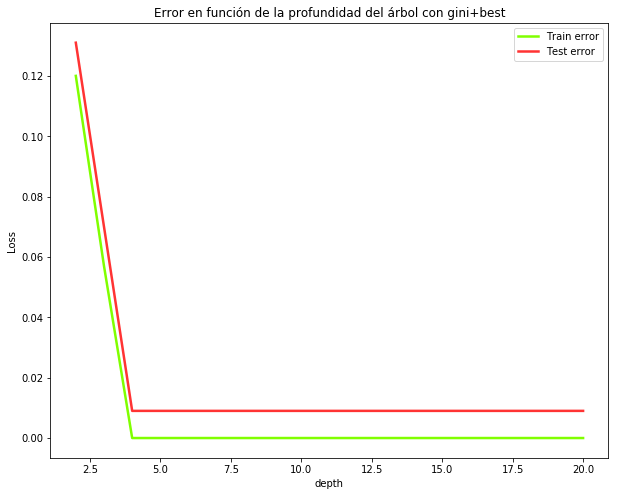

In [426]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("Loss")
plt.title("Error en función de la profundidad del árbol con gini+best")
plt.plot(depth, trainErrors, lw=2.5, color=(0.5,1,0), label='Train error')
plt.plot(depth, testErrors, lw=2.5, color=(1,0.2,0.2), label='Test error')
plt.legend()
plt.show()

In [427]:
trainErrors=[]
testErrors=[]
depth=[]
for i in range(2,21):
    clf=Tree(criterion='gini',splitter='random',random_state=44,max_depth=i)
    clf.fit(X_train,Y_train)
    testErrors.append(1-clf.score(X_test,Y_test))
    trainErrors.append(1-clf.score(X_train,Y_train))
    depth.append(i)

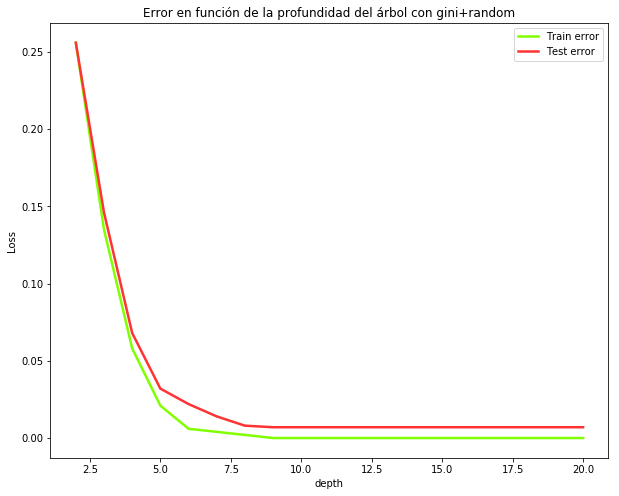

In [428]:
plt.figure(figsize=(10, 8))
plt.xlabel("depth")
plt.ylabel("Loss")
plt.title("Error en función de la profundidad del árbol con gini+random")
plt.plot(depth, trainErrors, lw=2.5, color=(0.5,1,0), label='Train error')
plt.plot(depth, testErrors, lw=2.5, color=(1,0.2,0.2), label='Test error')
plt.legend()
plt.show()

# F

In [431]:
kpca = KernelPCA(n_components=2,kernel="rbf", gamma=5)
kpca = kpca.fit(X_train)
Xkpca_train = kpca.transform(X_train)
Xkpca_test = kpca.transform(X_test)

# G

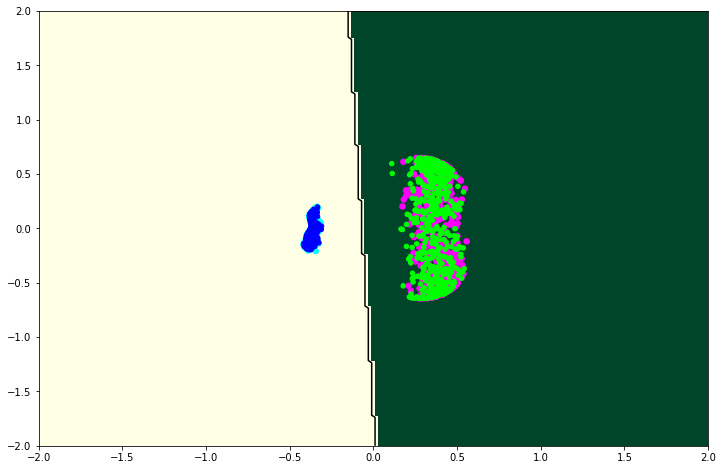

In [437]:
model= SVM()
model.set_params(kernel='linear')
model.fit(Xkpca_train,Y_train)
#pcaModels.append(model)
#yPredictSVM=model.predict(Xkpca_test)
plot_classifier(model,Xkpca_train,Y_train,Xkpca_test,Y_test,'ann')

# 3 Calidad de un Vino